# Telecom Churn - Case Study

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
#Reading Dataset
df=pd.read_csv('telecom_churn_data.csv')

In [3]:
#head of dataset
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#statistical info of dataset
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
#dataset info
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
#no. of rows and colums of dataset
df.shape

(99999, 226)

## Scrapping the dataset

`Inference`

1. circle_id - contains unique value in entire column
2. mobile number - which contains mobile number of subscribers 
3. Date columns - which gives info about the date when the customer recharged etc.

*The above data will not be useful for our analysis. So, will drop them*

In [7]:
#Removing ID, mobile number and Date columns
df_filtered=df.drop(['mobile_number',
 'circle_id',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9'], axis=1)

In [8]:
#checking the shape of dataset after dropping the columns
df_filtered.shape

(99999, 212)

In [9]:
# Defining the Categorical columns in the dataset
categorical_column=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6',
                    'fb_user_7','fb_user_8','fb_user_9']

# Defining the Numerical columns in the dataset
numerical_column=set(df_filtered.columns) - set(categorical_column)

In [10]:
#chekcing the null values in the dataset
((df_filtered.isnull().sum()/len(df_filtered))*100).sort_values(ascending = False)

arpu_2g_6             74.846748
max_rech_data_6       74.846748
count_rech_3g_6       74.846748
night_pck_user_6      74.846748
fb_user_6             74.846748
total_rech_data_6     74.846748
count_rech_2g_6       74.846748
arpu_3g_6             74.846748
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
max_rech_data_7       74.428744
night_pck_user_7      74.428744
total_rech_data_7     74.428744
arpu_2g_7             74.428744
arpu_3g_7             74.428744
count_rech_2g_7       74.428744
fb_user_7             74.428744
count_rech_3g_7       74.428744
arpu_3g_9             74.077741
arpu_2g_9             74.077741
count_rech_2g_9       74.077741
count_rech_3g_9       74.077741
av_rech_amt_data_9    74.077741
night_pck_user_9      74.077741
max_rech_data_9       74.077741
total_rech_data_9     74.077741
fb_user_9             74.077741
max_rech_data_8       73.660737
count_rech_2g_8       73.660737
total_rech_data_8     73.660737
                        ...    
vol_3g_m

`Inference`

*We notice there are columns which provides the information about the recharge of the subscribers. Those columns have null values and we can safely assume that the blanks are zero as the subscriber dint recharge*

*So will impute those columns with zero*

In [11]:
# create a list of recharge columns where we will impute missing values with zeroes
impute_specific_recharge_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [12]:
# impute missing values with 0
df_filtered[impute_specific_recharge_col] = df_filtered[impute_specific_recharge_col].apply(lambda x: x.fillna(0))

`Inference`

*There are categorical columns with null values / blank and will impute them with ‘-1’ where the -1 will be a new category in the column*

In [13]:
# replace missing values with '-1' in categorical columns
df_filtered[categorical_column] = df_filtered[categorical_column].apply(lambda x: x.fillna(-1))

In [14]:
((df_filtered.isnull().sum()/len(df_filtered))*100).sort_values(ascending = False)

arpu_2g_6             74.846748
count_rech_2g_6       74.846748
arpu_3g_6             74.846748
count_rech_3g_6       74.846748
arpu_2g_7             74.428744
count_rech_2g_7       74.428744
arpu_3g_7             74.428744
count_rech_3g_7       74.428744
count_rech_3g_9       74.077741
arpu_3g_9             74.077741
arpu_2g_9             74.077741
count_rech_2g_9       74.077741
count_rech_3g_8       73.660737
count_rech_2g_8       73.660737
arpu_3g_8             73.660737
arpu_2g_8             73.660737
std_og_t2c_mou_9       7.745077
spl_ic_mou_9           7.745077
std_og_mou_9           7.745077
loc_og_t2c_mou_9       7.745077
isd_og_mou_9           7.745077
ic_others_9            7.745077
loc_og_t2f_mou_9       7.745077
isd_ic_mou_9           7.745077
og_others_9            7.745077
std_og_t2t_mou_9       7.745077
loc_og_mou_9           7.745077
std_og_t2f_mou_9       7.745077
loc_og_t2m_mou_9       7.745077
std_ic_t2f_mou_9       7.745077
                        ...    
total_re

`Inference`

*As we see there are coluns with greater than 70% null values, will drop those columns*

In [15]:
#Filtering record which is having less than 70% of null vlue
df_filtered=df_filtered[df_filtered.columns[df_filtered.isnull().mean() < 0.7]]

In [16]:
((df_filtered.isnull().sum()/len(df_filtered))*100).sort_values(ascending = False)

std_og_mou_9          7.745077
ic_others_9           7.745077
std_ic_mou_9          7.745077
spl_og_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
spl_ic_mou_9          7.745077
isd_ic_mou_9          7.745077
loc_og_t2f_mou_9      7.745077
isd_og_mou_9          7.745077
roam_og_mou_9         7.745077
loc_og_t2c_mou_9      7.745077
og_others_9           7.745077
loc_og_mou_9          7.745077
std_og_t2c_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_t2t_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_og_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
loc_ic_mou_9          7.745077
offnet_mou_9          7.745077
loc_ic_t2m_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
loc_ic_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
onnet_mou_9           7.745077
std_og_t2c_mou_8      5.378054
                        ...   
total_rech_num_8      0.000000
total_re

`Inference`

*After dropping the columns with >70% null values, we are left with columns which has 7.7% null values. As it is system generated data of the subscriber of the telecom company, we can safely assume that any null values or the blank cells aren’t used by the subscriber*

*For example, if the 2g or 3g data usage column has null values, that mean subscriber dint use the service. Hence Will impute the remaining null / blank cells with zero*

In [17]:
# impute numerical datatype missing values with 0
df_filtered = df_filtered.apply(lambda x: x.fillna(0))

In [18]:
#chekcing the null values after imputing
((df_filtered.isnull().sum()/len(df_filtered))*100).sort_values(ascending = False)

sep_vbc_3g            0.0
og_others_7           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
og_others_6           0.0
og_others_8           0.0
jun_vbc_3g            0.0
og_others_9           0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9          0.0
loc_ic_mou_8          0.0
                     ... 
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6

`Inference`

*We got the dataset without any null / blank cells*

*Now will try to find the columns which has unique values in the entire column and will try to remove them as they don’t add any significant value to the model*

In [19]:
#Finding the column where we have only one unique value
for x in df_filtered:
    if len(df_filtered[x].unique())==1:
        print(x)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [20]:
#Creating list on unique value column to drop it
unique_col=['loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9']

In [21]:
# Dropping all the unique value column
churn=df_filtered.drop(unique_col,axis=1)

In [22]:
# Checking for unique value column
#for x in churn:
#    if len(churn[x].unique())==1:
#        print('Yes')

### Deriving a new variable 

*creating a column which gives us the average recharge of the subscriber for the month of 6 and 7*

In [23]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [24]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [25]:
# calculate average recharge done by customer in June and July
churn['avg_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

*Will find out the 70% percentile as we need to filter high values customer based on it*

In [26]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.avg_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


*Filtering out the high value customer based on 70% percentile / 487*

In [27]:
 #retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_high_val = churn.loc[churn.avg_amt_data_6_7 >= churn.avg_amt_data_6_7.quantile(0.7), :]
df_high_val = df_high_val.reset_index(drop=True)
df_high_val.shape

(30001, 190)

`Inference`

*We see that after filtering out, we are ending up with 30001 rows whereas as per the problem statement we must have 29.9K rows. So instead of filtering out directly based on the 70th percentile number, will use 'qcut' option in pandas*

*`qcut` basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins*

In [28]:
#Performing the qcut on the churn.avg_rech_amt_6_7 column by creaitng 
#10 bins (aka deciles) and store the results back in the original dataframe
churn['avg_rech_decile'] = pd.qcut(churn['avg_amt_data_6_7'], 10, labels=False)

In [29]:
#Filtering out the customers belonging to 70 percentile and above
High_Value_Customer = churn[churn.avg_rech_decile >= 7 ]

In [30]:
#Checking out number of unique customers
High_Value_Customer.shape

(29953, 191)

`Inference`

*Now we got 29.9k rows after filtering out for high-value customers*

In [31]:
# calculate total incoming and outgoing minutes of usage
High_Value_Customer['total_calls_mou_9'] = High_Value_Customer.total_ic_mou_9 + High_Value_Customer.total_og_mou_9

In [32]:
# calculate 2g and 3g data consumption
High_Value_Customer['total_internet_mb_9'] =  High_Value_Customer.vol_2g_mb_9 + High_Value_Customer.vol_3g_mb_9

In [33]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have 
#churned 0 - not churn, 1 - churn
High_Value_Customer['churn'] = High_Value_Customer.apply(lambda row: 1 if (row.total_calls_mou_9 == 
                                                                           0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [34]:
# delete derived variables
High_Value_Customer = High_Value_Customer.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [35]:
# change data type to category
High_Value_Customer.churn = High_Value_Customer.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(High_Value_Customer.churn.value_counts()*100/High_Value_Customer.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


*Will try to find out / find the patter of difference between Aug and Jun + jug which may give us some valuable insight*

In [36]:
High_Value_Customer['arpu_diff'] = High_Value_Customer.arpu_8 - ((High_Value_Customer.arpu_6 + High_Value_Customer.arpu_7)/2)

High_Value_Customer['onnet_mou_diff'] = High_Value_Customer.onnet_mou_8 - ((High_Value_Customer.onnet_mou_6 + High_Value_Customer.onnet_mou_7)/2)

High_Value_Customer['offnet_mou_diff'] = High_Value_Customer.offnet_mou_8 - ((High_Value_Customer.offnet_mou_6 + High_Value_Customer.offnet_mou_7)/2)

High_Value_Customer['roam_ic_mou_diff'] = High_Value_Customer.roam_ic_mou_8 - ((High_Value_Customer.roam_ic_mou_6 + High_Value_Customer.roam_ic_mou_7)/2)

High_Value_Customer['roam_og_mou_diff'] = High_Value_Customer.roam_og_mou_8 - ((High_Value_Customer.roam_og_mou_6 + High_Value_Customer.roam_og_mou_7)/2)

High_Value_Customer['loc_og_mou_diff'] = High_Value_Customer.loc_og_mou_8 - ((High_Value_Customer.loc_og_mou_6 + High_Value_Customer.loc_og_mou_7)/2)

High_Value_Customer['std_og_mou_diff'] = High_Value_Customer.std_og_mou_8 - ((High_Value_Customer.std_og_mou_6 + High_Value_Customer.std_og_mou_7)/2)

High_Value_Customer['isd_og_mou_diff'] = High_Value_Customer.isd_og_mou_8 - ((High_Value_Customer.isd_og_mou_6 + High_Value_Customer.isd_og_mou_7)/2)

High_Value_Customer['spl_og_mou_diff'] = High_Value_Customer.spl_og_mou_8 - ((High_Value_Customer.spl_og_mou_6 + High_Value_Customer.spl_og_mou_7)/2)

High_Value_Customer['total_og_mou_diff'] = High_Value_Customer.total_og_mou_8 - ((High_Value_Customer.total_og_mou_6 + High_Value_Customer.total_og_mou_7)/2)

High_Value_Customer['loc_ic_mou_diff'] = High_Value_Customer.loc_ic_mou_8 - ((High_Value_Customer.loc_ic_mou_6 + High_Value_Customer.loc_ic_mou_7)/2)

High_Value_Customer['std_ic_mou_diff'] = High_Value_Customer.std_ic_mou_8 - ((High_Value_Customer.std_ic_mou_6 + High_Value_Customer.std_ic_mou_7)/2)

High_Value_Customer['isd_ic_mou_diff'] = High_Value_Customer.isd_ic_mou_8 - ((High_Value_Customer.isd_ic_mou_6 + High_Value_Customer.isd_ic_mou_7)/2)

High_Value_Customer['spl_ic_mou_diff'] = High_Value_Customer.spl_ic_mou_8 - ((High_Value_Customer.spl_ic_mou_6 + High_Value_Customer.spl_ic_mou_7)/2)

High_Value_Customer['total_ic_mou_diff'] = High_Value_Customer.total_ic_mou_8 - ((High_Value_Customer.total_ic_mou_6 + High_Value_Customer.total_ic_mou_7)/2)

High_Value_Customer['total_rech_num_diff'] = High_Value_Customer.total_rech_num_8 - ((High_Value_Customer.total_rech_num_6 + High_Value_Customer.total_rech_num_7)/2)

High_Value_Customer['total_rech_amt_diff'] = High_Value_Customer.total_rech_amt_8 - ((High_Value_Customer.total_rech_amt_6 + High_Value_Customer.total_rech_amt_7)/2)

High_Value_Customer['max_rech_amt_diff'] = High_Value_Customer.max_rech_amt_8 - ((High_Value_Customer.max_rech_amt_6 + High_Value_Customer.max_rech_amt_7)/2)

High_Value_Customer['total_rech_data_diff'] = High_Value_Customer.total_rech_data_8 - ((High_Value_Customer.total_rech_data_6 + High_Value_Customer.total_rech_data_7)/2)

High_Value_Customer['max_rech_data_diff'] = High_Value_Customer.max_rech_data_8 - ((High_Value_Customer.max_rech_data_6 + High_Value_Customer.max_rech_data_7)/2)

High_Value_Customer['av_rech_amt_data_diff'] = High_Value_Customer.av_rech_amt_data_8 - ((High_Value_Customer.av_rech_amt_data_6 + High_Value_Customer.av_rech_amt_data_7)/2)

High_Value_Customer['vol_2g_mb_diff'] = High_Value_Customer.vol_2g_mb_8 - ((High_Value_Customer.vol_2g_mb_6 + High_Value_Customer.vol_2g_mb_7)/2)

High_Value_Customer['vol_3g_mb_diff'] = High_Value_Customer.vol_3g_mb_8 - ((High_Value_Customer.vol_3g_mb_6 + High_Value_Customer.vol_3g_mb_7)/2)

*Will delete columns that belong to the churn month*

In [37]:
# delete all variables relating to 9th month
High_Value_Customer = High_Value_Customer.filter(regex='[^9]$', axis=1)
High_Value_Customer.shape

(29953, 170)

In [38]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
categorical_column = [col for col in categorical_column if col not in col_9_names]
categorical_column.append('churn')
numerical_column = [col for col in High_Value_Customer.columns if col not in categorical_column]

## visualise data

In [39]:
# change columns types
High_Value_Customer[numerical_column] = High_Value_Customer[numerical_column].apply(pd.to_numeric)
High_Value_Customer[categorical_column] = High_Value_Customer[categorical_column].apply(lambda column: column.astype("category"), axis=0)

<Figure size 1440x360 with 0 Axes>

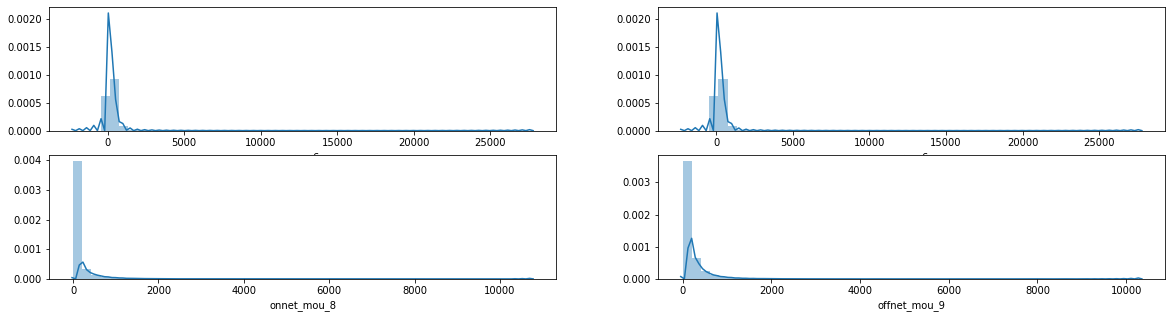

In [40]:
plt.figure(figsize=(20, 5))
plt.subplot(2,2,1)
sns.distplot(churn.arpu_6)

plt.subplot(2,2,2)
sns.distplot(churn.arpu_6)

plt.subplot(2,2,3)
sns.distplot(churn.onnet_mou_8)

plt.subplot(2,2,4)
sns.distplot(churn.offnet_mou_9)

`Inference`

*The variables are highly skewed towards the left*

<Figure size 1080x360 with 0 Axes>

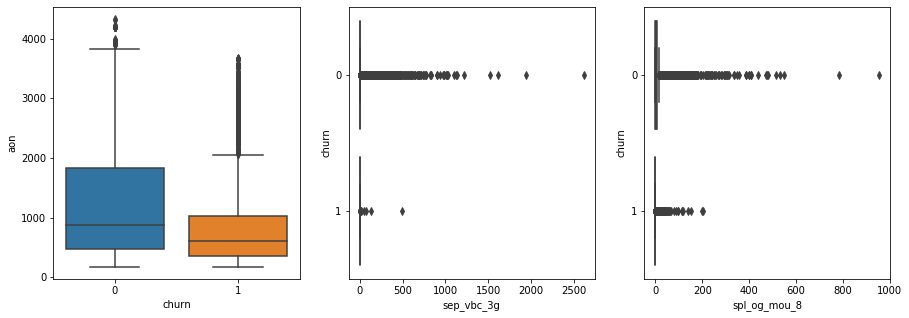

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'churn', y = 'aon', data = High_Value_Customer)

plt.subplot(1,3,2)
sns.boxplot(x = 'sep_vbc_3g', y = 'churn', data = High_Value_Customer)

plt.subplot(1,3,3)
sns.boxplot(x = 'spl_og_mou_8', y = 'churn', data = High_Value_Customer)

*Before we move on to the modelling, lets cap outliers in all numeric variables using `k-sigma technique`

In [42]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [43]:
# cap outliers in the numeric columns
High_Value_Customer[numerical_column] = High_Value_Customer[numerical_column].apply(cap_outliers, axis=0)

# Modelling
## Preprocessing data

In [44]:
# change churn to numeric
High_Value_Customer['churn'] = pd.to_numeric(High_Value_Customer['churn'])

### Train Test split

In [45]:
# divide data into train and test
X = High_Value_Customer.drop("churn", axis = 1)
y = High_Value_Customer.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [46]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(20967, 169)

(20967,)

(8986, 169)

(8986,)

## Aggregating the categorical columns

In [47]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.098943
 0.0    0.066187
 1.0    0.106164
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.114634
 0.0    0.055651
 1.0    0.071161
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141321
 0.0    0.028829
 1.0    0.029046
Name: churn, dtype: float64

fb_user_6
-1.0    0.098943
 0.0    0.069767
 1.0    0.066980
Name: churn, dtype: float64

fb_user_7
-1.0    0.114634
 0.0    0.061834
 1.0    0.055500
Name: churn, dtype: float64

fb_user_8
-1.0    0.141321
 0.0    0.061739
 1.0    0.025070
Name: churn, dtype: float64

In [48]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [49]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in categorical_column if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20967 entries, 25023 to 60112
Data columns (total 6 columns):
night_pck_user_6    20967 non-null float64
night_pck_user_7    20967 non-null float64
night_pck_user_8    20967 non-null float64
fb_user_6           20967 non-null float64
fb_user_7           20967 non-null float64
fb_user_8           20967 non-null float64
dtypes: float64(6)
memory usage: 1.1 MB


## PCA

In [50]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [51]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [52]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.45
1       20.87
2       26.83
3       31.81
4       36.34
5       39.91
6       42.63
7       45.24
8       47.53
9       49.69
10      51.64
11      53.53
12      55.28
13      56.92
14      58.52
15      60.09
16      61.51
17      62.81
18      64.10
19      65.38
20      66.55
21      67.67
22      68.75
23      69.79
24      70.80
25      71.75
26      72.68
27      73.59
28      74.47
29      75.32
        ...  
139     99.86
140     99.87
141     99.88
142     99.89
143     99.90
144     99.91
145     99.91
146     99.92
147     99.93
148     99.93
149     99.94
150     99.94
151     99.95
152     99.95
153     99.96
154     99.96
155     99.97
156     99.97
157     99.98
158     99.98
159     99.98
160     99.99
161     99.99
162     99.99
163     99.99
164    100.00
165    100.00
166    100.00
167    100.00
168    100.00
Length: 169, dtype: float64


~ 60 components explain 90% variance

~ 80 components explain 95% variance

<Figure size 630x360 with 0 Axes>

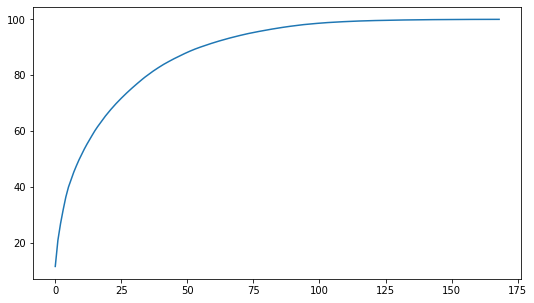

In [53]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [54]:
# create pipeline
PCA_VARS = 80
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [55]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=80,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

0.8263461630180761

### Evaluate on test data

In [56]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

In [57]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6852 1404]
 [ 124  606]]


In [58]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.83
Specificity: 	0.83


In [59]:
# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [60]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918777
1    0.081223
Name: churn, dtype: float64

In [61]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [62]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

In [63]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.723104,0.008432,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,3.712203,1.239682,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2,3.287426,0.210118,0.246298,0.143047,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.897818,0.903427,0.893342,0.887506,0.891836,0.894786,0.005434,11
3,3.956075,0.165842,0.102370,0.014593,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.899702,0.905214,0.896246,0.892206,0.898160,0.898306,0.004269,5
4,2.836196,0.021769,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
5,3.357846,0.196729,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
6,3.555332,0.203452,0.106042,0.016249,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.896643,0.905100,0.893835,0.888106,0.892973,0.895331,0.005607,9
7,4.581494,0.133472,0.099933,0.009594,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.899579,0.903619,0.896275,0.893015,0.898770,0.898252,0.003526,7
8,2.841180,0.121390,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
9,3.548497,0.102535,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28


In [64]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8987195760888984
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [65]:
# predict churn on test data
y_pred = model.predict(X_test)

In [66]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7089 1167]
 [ 145  585]]


In [67]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.8
Specificity: 	0.86


In [68]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.9


### Random Forest

In [69]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [70]:
# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

In [71]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

In [72]:
# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [73]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [74]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9281467188588424
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [75]:
# predict churn on test data
y_pred = model.predict(X_test)

In [76]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8136  120]
 [ 386  344]]


In [77]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.47
Specificity: 	0.99


In [78]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.93


`Inference`

*So, when we analyse the scores of both the models, we can understand that Random forest has poor sensitivity. So, we can safely say that PCA along with Logistic regression will be the best model for this analysis*

## Choosing best features

In [79]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [80]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [81]:
# OOB score
rf_model.oob_score_

0.9436256975246816

In [82]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [83]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[8150  106]
 [ 405  325]]


In [84]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.45
Specificity: 	0.99


In [85]:
# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Feature Importance

In [86]:
# predictors
features = High_Value_Customer.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,total_og_mou_8,4.553688
1,loc_ic_t2t_mou_8,4.410740
2,loc_ic_mou_8,3.956715
3,loc_ic_t2m_mou_8,3.668150
4,total_ic_mou_8,3.464227
5,arpu_diff,2.821215
6,last_day_rch_amt_8,2.543840
7,total_rech_amt_diff,2.212163
8,total_rech_amt_8,2.018605
9,loc_og_t2m_mou_8,2.001013


### Extracting top 30 features

In [87]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

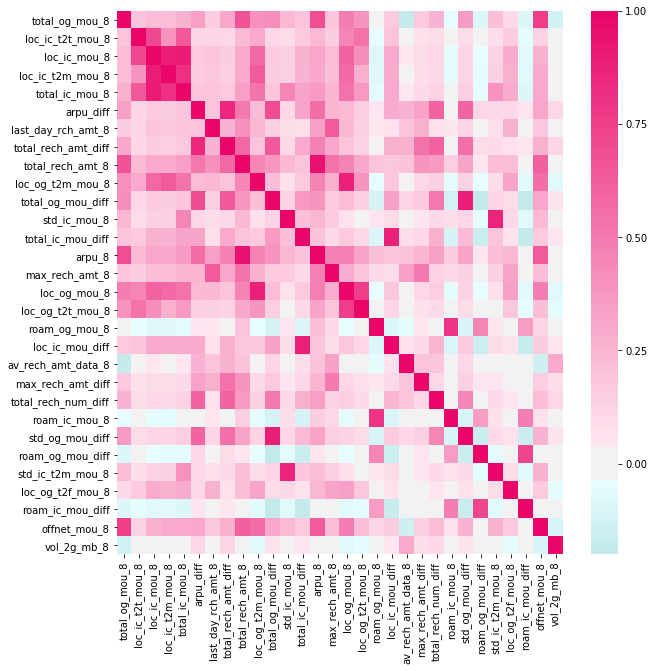

In [88]:
# plot feature correlation

plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [89]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [90]:
# logistic regression
steps = [('scaler', StandardScaler()), ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [91]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
      

In [92]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8732722602061866
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [93]:
# predict churn on test data
y_pred = model.predict(X_test)

In [94]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6937 1319]
 [ 144  586]]


In [95]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.8
Specificity: 	0.84


In [96]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

ROC:    	 0.88


### Extract the intercept and the coefficients from the logistic model 

In [97]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [98]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [99]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [100]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.515791,-1.133135,-0.707501,-1.53159,0.226722,-0.024287,0.206212,0.053063,-0.78127,0.94864


## Business Insights
1. When we analyse the top features, we notice that the outgoing calls / incoming calls are the most importance and telecom company can subsidize or can release some special packages for those subscribers. To be more precise, 
    - Outgoing calls - The feature "total_og_mou" stands out as the top most features and the telecom company can focus on over all outgoing calls instead of differentiating them based on mobile to mobile / landline or own network to own network / other netwrk
    - Incoming calls - Here instead of focusing at overall level for incoming calls, telecom company can focus more on Operator T to T, i.e. within same operator (mobile to mobile) as the feature "loc_ic_t2t_mou_8" is second more important one
- The subscriber who use highest STD and ISD calls should be focused from both call rates and service perspectives to retain them
